In [10]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random
from IPython.display import clear_output

In [11]:
#loading H matrix from Hmatrix.mat file and converting it to numpy array
mat = scipy.io.loadmat('Hmatrix3.mat')
arr = mat['H']

In [12]:
c = len(arr[0])#size of column 2
r = len(arr)#size of coulmn 1
print(c)
print(r)

12
9


In [13]:
#column vector of size 1 to c
Msg_generated = np.zeros((1, c))
Msg_generated = np.transpose(Msg_generated)

In [14]:
#creating p evenly spaced
p = np.linspace(0, 1.1, 11, endpoint = False)
print(p)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [15]:
#column vector of size 1 to length of p i.e. 11
prob_s = np.zeros(11, dtype = float)
#prob_s = np.transpose(prob_s)
prob_s=np.ndarray.tolist(prob_s)
print(prob_s)
len(prob_s)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


11

In [16]:
#defining
kk = 0
Nsim = 1000

In [17]:
loop_counter = -1
update_err_no = []
for d in p:
    loop_counter+=1
    Sum_s = 0
    for b in range(Nsim):
        clear_output(wait = True)
        print(loop_counter+(np.round((b/Nsim)*100, 2))/100,"%")
        transmitted = []
        noise = []
    
        for z in range(c):
            if(random.random() > 1-d):
                transmitted.append(1)
            else:
                transmitted.append(0)
        ##transmitted = rand(1,c) > 1 -d
        
        for q in range(c): # Noise generating
            if(random.random() > 1-d): 
                noise.append(1)
            else:
                noise.append(0)
                
        ##noise = rand(1,c) > 1 - d # generating the random numbers between 1 to c and defining noise
        for w in range(c): # Generating Random Message after adding noise
            if noise[w] == 1:
                Msg_generated[w] = -1
            else:
                Msg_generated[w] = noise[w]^transmitted[w] #implementing the XOR function with Noise and Transmitted Message
        e_count = 0
        for z in range(len(Msg_generated)):
            if Msg_generated[z] != 0 and Msg_generated[z] != 1: #Counting Total number of Erasures present in the Message
                e_count += 1
        succ = 1
        temp_cnt = 0 # Temporary Counter for storing error count of previous iteration
        itcheck = 1 # Iteration counter
       
        
        # index of update_err_no
        
        update_err_no.append(e_count)
        while e_count > 0 and itcheck<=50:
            if temp_cnt == e_count: # Checking whether number of erasures are same after each iteration
                # disp("This code cant be resolved as it as errors which cannot be corrected")
                succ = 0
                break
            temp_cnt = e_count

            for i in range(r):
                no1 = 0
                nerr = 0
                index = 0
                for j in range(c): # Message passing from Variable-Node to Check-node
                    if arr[i][j] == 1: 
                        if Msg_generated[j] == 1:
                            no1 += 1 # Counting Number of ones in variable nodes connected to particular check-node
                        elif Msg_generated[j] == 0:
                            no1 += 0
                        else:
                            nerr += 1 # Counting NUmber of erasures present in variable nodes 
                            index = j 
                if nerr == 1: # If Number of Erasures are one for that check-node
                    Msg_generated[index] = no1%2 # Message passing from Check-Node to Variable-Node
                    e_count -= 1
                itcheck += 1
                if e_count == 0: # Checking whether there are any erasures left or not
                    succ = 1 # If number of Erasures are zero then message is successfully decoded
                    break
        if succ == 1:
            Sum_s = Sum_s + 1
    prob_s[kk] = Sum_s/Nsim
    kk = kk + 1

10.999 %


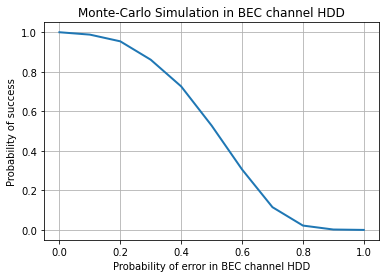

In [18]:
#graphing
q = np.transpose(p)
x = np.transpose(prob_s)
plt.plot(q, x, linewidth = 2)
plt.title("Monte-Carlo Simulation in BEC channel HDD")
plt.xlabel("Probability of error in BEC channel HDD")
plt.ylabel("Probability of success") 
plt.grid()
